In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv("bank-additional-full.csv", sep=';')

print(df.head())
print(df.shape)
print(df.info())
print(df.describe())

print(df.isnull().sum())

for col in df.select_dtypes('object').columns:
    print(f"\n{col} :")
    print(df[col].value_counts(normalize=True) * 100)

plt.figure(figsize=(5,4))
sns.countplot(data=df, x='y', palette='pastel')
plt.title("Distribution de la variable cible (y)")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes('number').corr(), cmap='coolwarm', annot=True)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

cols = ['age', 'duration', 'campaign', 'pdays']
for c in cols:
    plt.figure(figsize=(5,4))
    sns.histplot(df[c], kde=True, bins=30)
    plt.title(f"Distribution de {c}")
    plt.show()

categorical_cols = ['job', 'marital', 'education', 'contact', 'poutcome']
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='y', palette='Set2')
    plt.title(f"Répartition de y selon {col}")
    plt.xticks(rotation=45)
    plt.show()

print("Nombre total de clients :", len(df))
print("Taux de souscription :", round(df['y'].value_counts(normalize=True)['yes']*100, 2), "%")


FileNotFoundError: [Errno 2] No such file or directory: 'bank-additional-full.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Combine features (X) and target (y) into a single DataFrame for easier analysis
df = pd.concat([X, y], axis=1)

print("Aperçu des 5 premières lignes du DataFrame :")
display(df.head())
print(f"\nDimensions du DataFrame : {df.shape}")

Aperçu des 5 premières lignes du DataFrame :


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no



Dimensions du DataFrame : (45211, 17)


In [ ]:
print("Informations générales sur le DataFrame :")
df.info()

print("\nStatistiques descriptives des variables numériques :")
display(df.describe())

Informations générales sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Statistiques descr

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
print("\nNombre de valeurs manquantes par colonne :")
display(df.isnull().sum())


Nombre de valeurs manquantes par colonne :


,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0


In [ ]:
print("\nDistribution des variables catégorielles :")
for col in df.select_dtypes('object').columns:
    print(f"\n{col} :")
    display(df[col].value_counts(normalize=True) * 100)


Distribution des variables catégorielles :

job :


,proportion
job,
blue-collar,21.663736
management,21.053803
technician,16.911159
admin.,11.510807
services,9.246934
retired,5.039735
self-employed,3.514903
entrepreneur,3.310108
unemployed,2.900519



marital :


,proportion
marital,
married,60.193316
single,28.289576
divorced,11.517109



education :


,proportion
education,
secondary,53.517553
tertiary,30.679983
primary,15.802463



default :


,proportion
default,
no,98.197341
yes,1.802659



housing :


,proportion
housing,
yes,55.583818
no,44.416182



loan :


,proportion
loan,
no,83.977351
yes,16.022649



contact :


,proportion
contact,
cellular,90.972632
telephone,9.027368



month :


,proportion
month,
may,30.448342
jul,15.250713
aug,13.817434
jun,11.813497
nov,8.781049
apr,6.485147
feb,5.859194
jan,3.103227
oct,1.632346



poutcome :


,proportion
poutcome,
failure,59.391663
other,22.297625
success,18.310713



y :


,proportion
y,
no,88.30152
yes,11.69848


/tmp/ipython-input-1895182321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='y', palette='pastel')


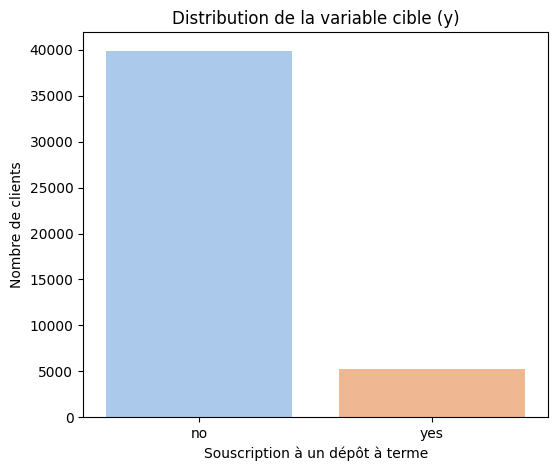


Nombre total de clients : 45211
Taux de souscription : 11.7 %


In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='y', palette='pastel')
plt.title("Distribution de la variable cible (y)")
plt.xlabel("Souscription à un dépôt à terme")
plt.ylabel("Nombre de clients")
plt.show()

print("\nNombre total de clients :", len(df))
print("Taux de souscription :", round(df['y'].value_counts(normalize=True).get('yes', 0)*100, 2), "%")

Matrice de corrélation des variables numériques :


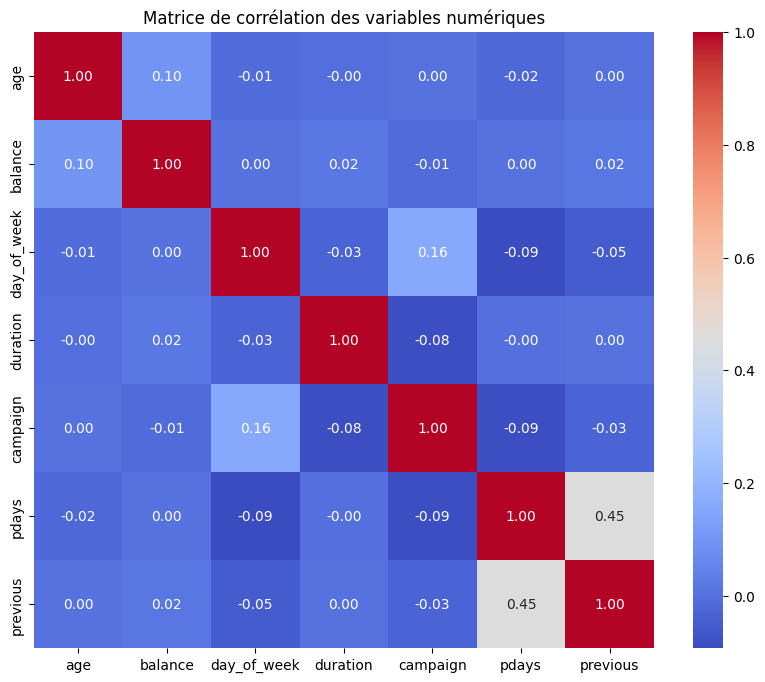

In [ ]:
print("Matrice de corrélation des variables numériques :")
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes('number').corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Matrice de corrélation des variables numériques")
plt.show()

Distributions des variables numériques clés :


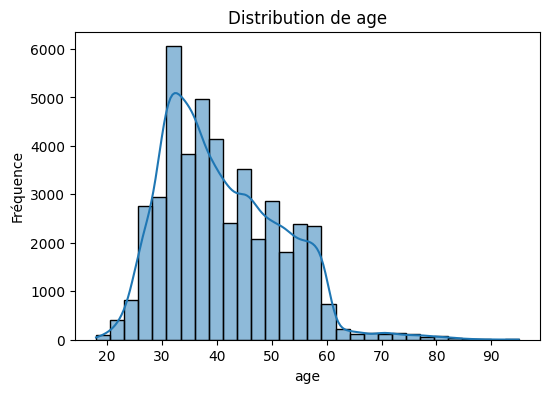

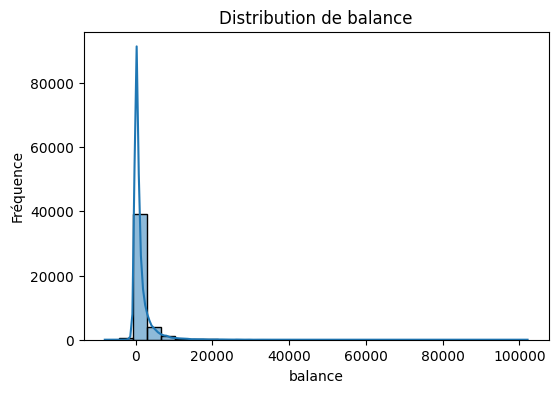

KeyError: 'day'

<Figure size 600x400 with 0 Axes>

In [ ]:
print("Distributions des variables numériques clés :")
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30) # dropna to handle NaN if any
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()

Répartition de la variable cible (y) en fonction des variables catégorielles :


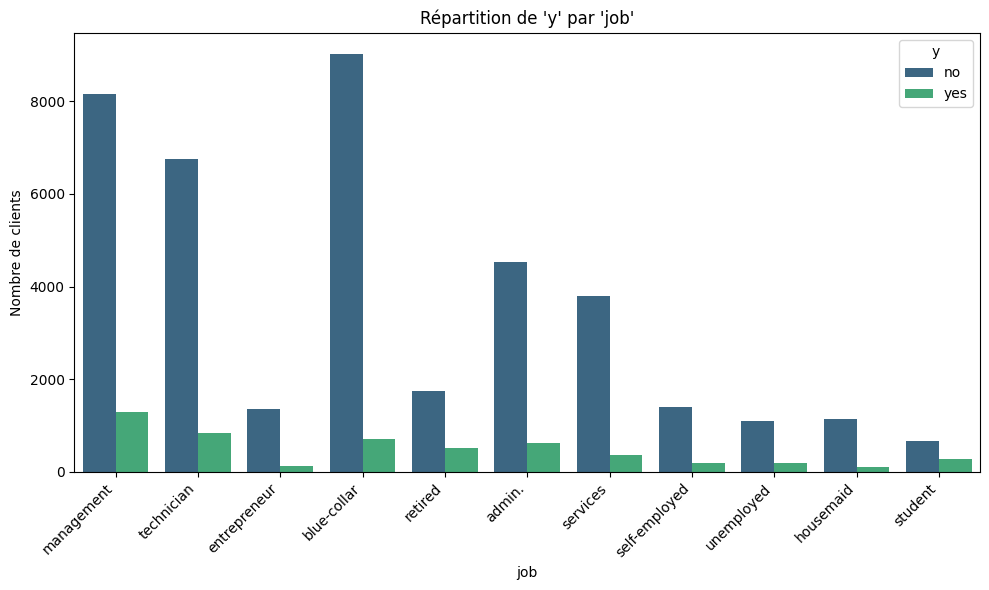

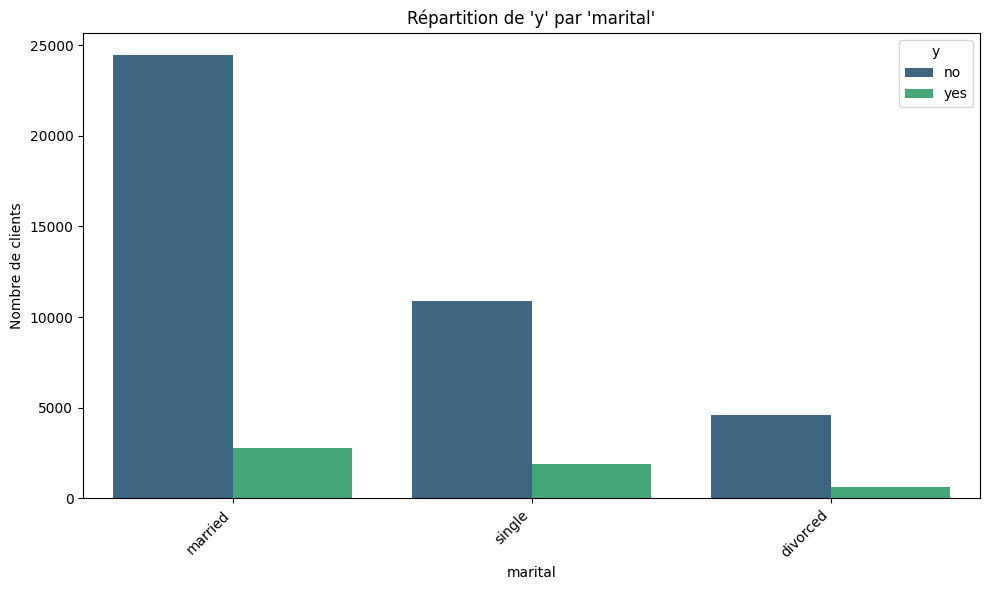

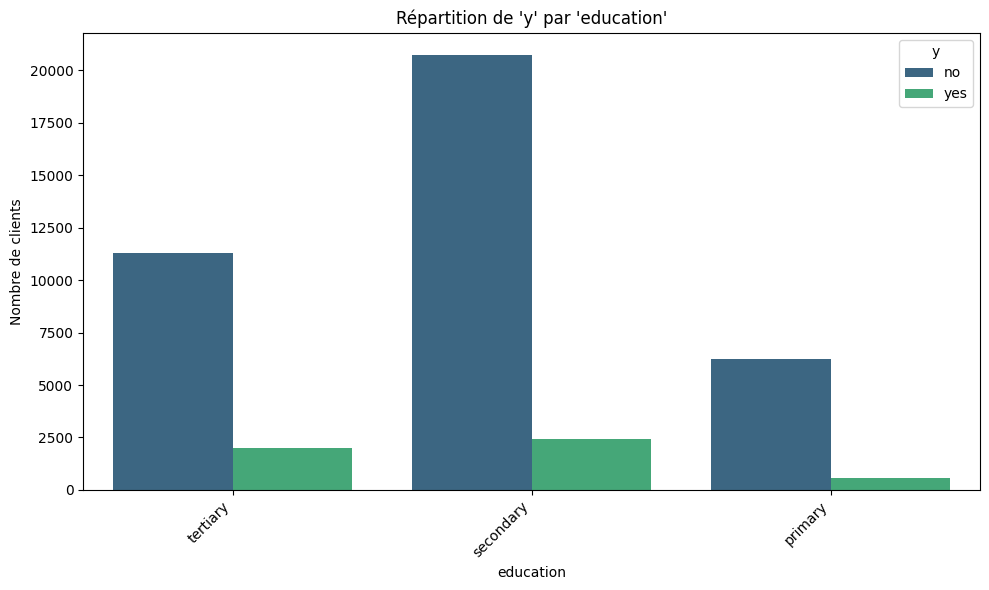

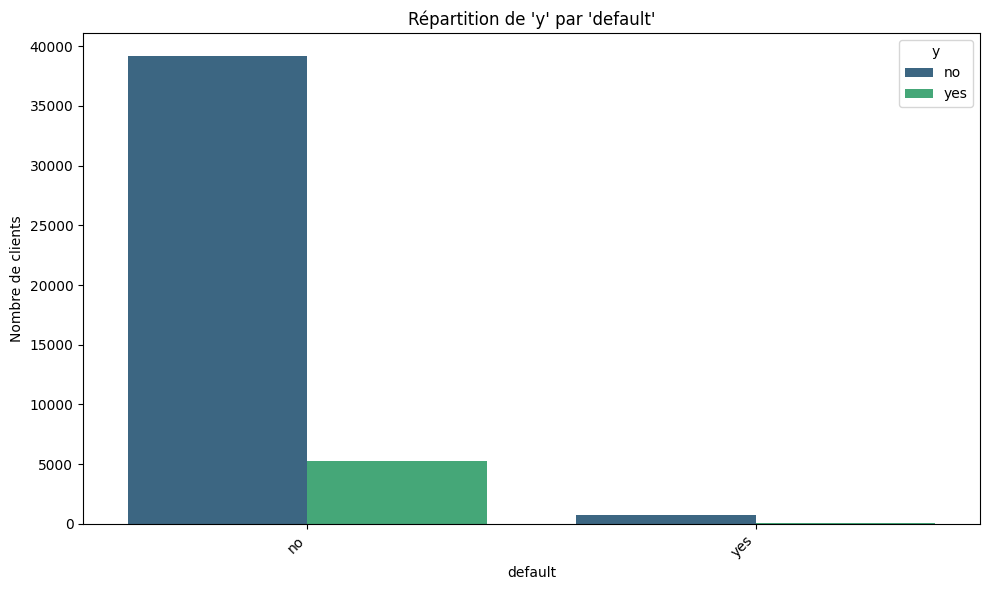

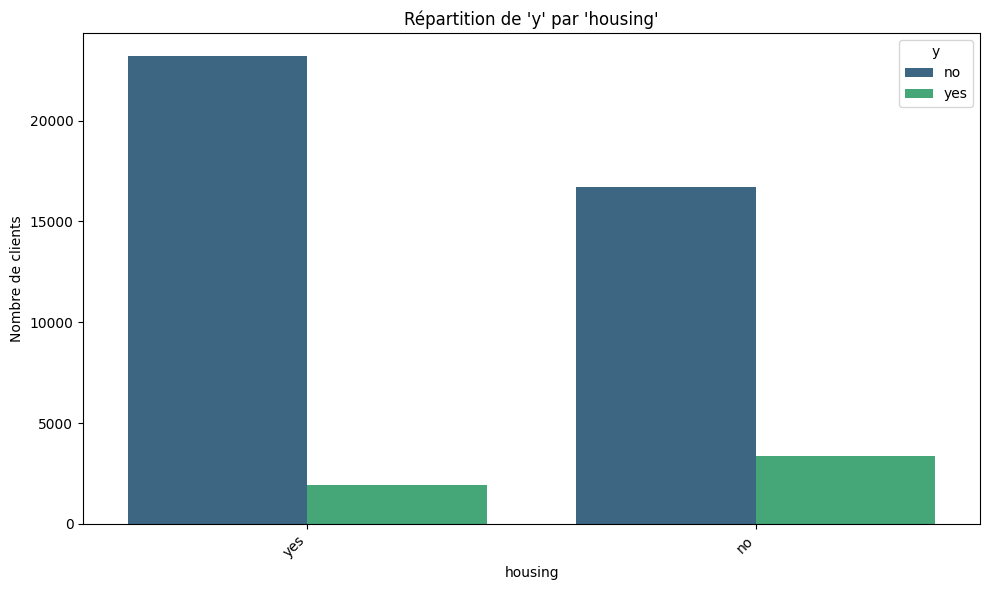

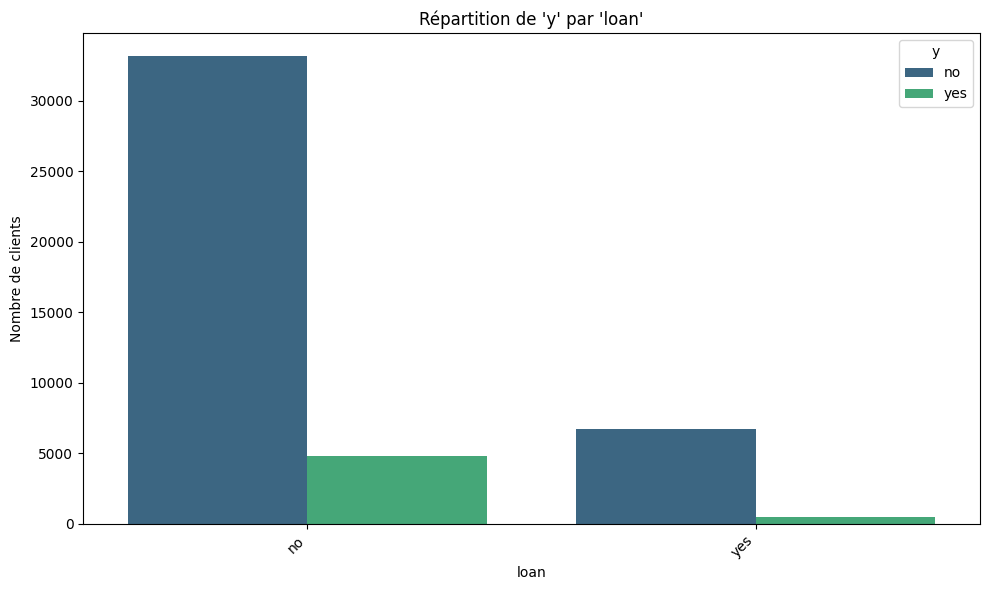

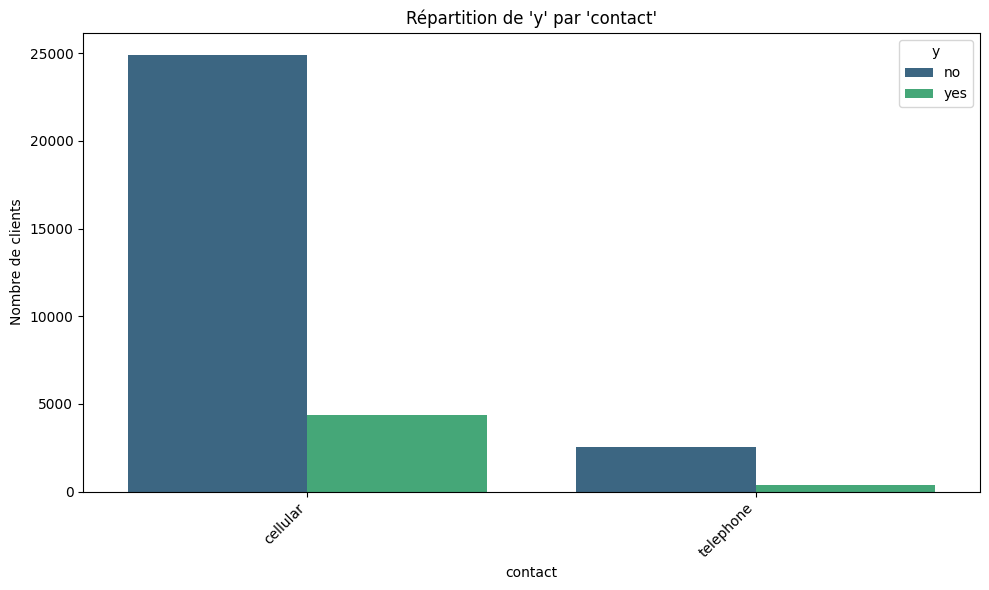

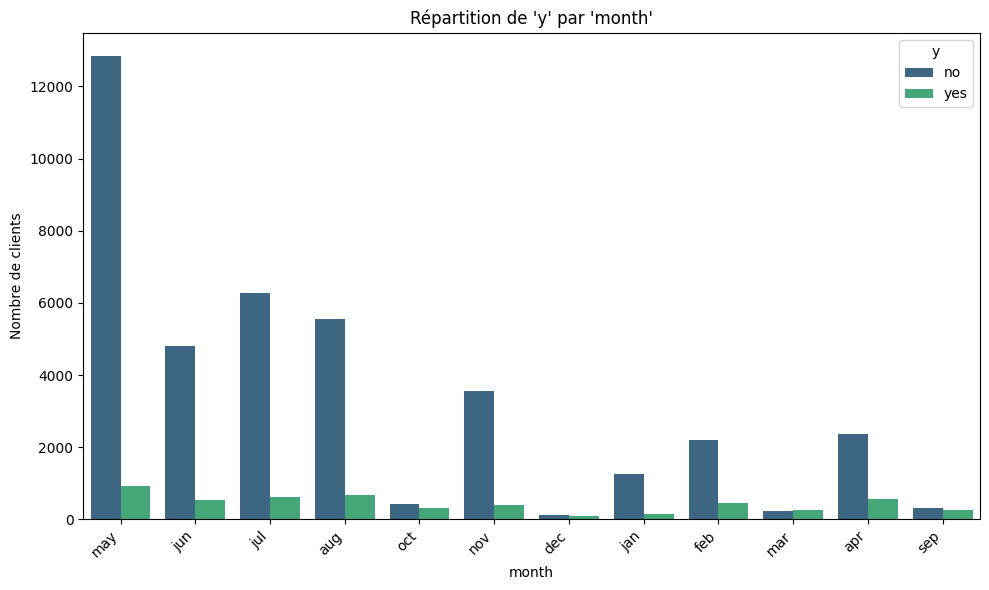

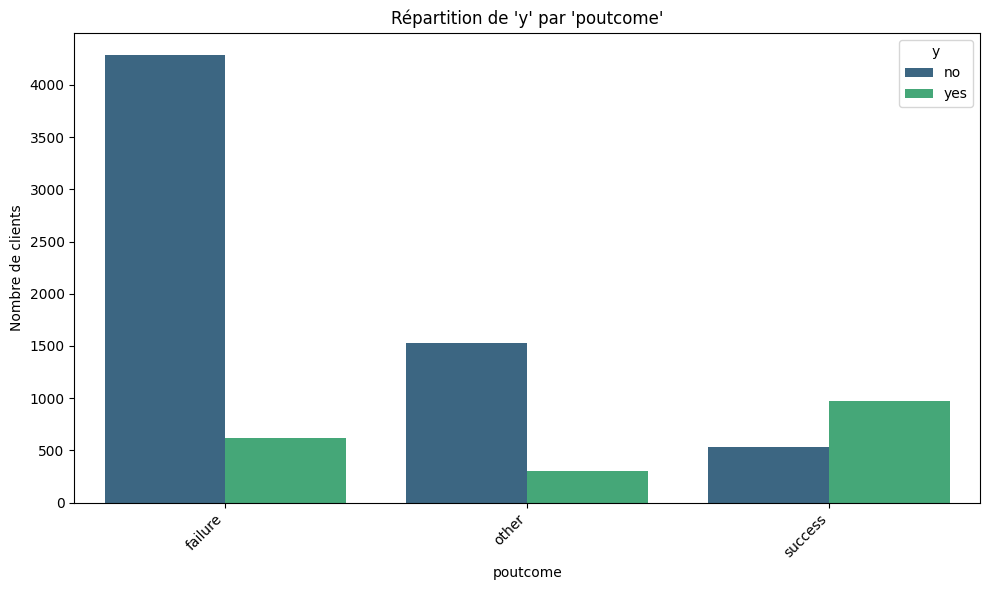

In [ ]:
print("Répartition de la variable cible (y) en fonction des variables catégorielles :")
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# For better visualization, we'll iterate and plot each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='y', palette='viridis')
    plt.title(f"Répartition de 'y' par '{col}'")
    plt.xlabel(col)
    plt.ylabel("Nombre de clients")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Combine features (X) and target (y) into a single DataFrame for easier analysis
df = pd.concat([X, y], axis=1)

print("Aperçu des 5 premières lignes du DataFrame :")
display(df.head())
print(f"\nDimensions du DataFrame : {df.shape}")

Aperçu des 5 premières lignes du DataFrame :


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no



Dimensions du DataFrame : (45211, 17)


In [ ]:
print("Informations générales sur le DataFrame :")
df.info()

print("\nStatistiques descriptives des variables numériques :")
display(df.describe())

Informations générales sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Statistiques descr

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
print("\nNombre de valeurs manquantes par colonne :")
display(df.isnull().sum())


Nombre de valeurs manquantes par colonne :


,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0


In [ ]:
print("\nDistribution des variables catégorielles :")
for col in df.select_dtypes('object').columns:
    print(f"\n{col} :")
    display(df[col].value_counts(normalize=True) * 100)


Distribution des variables catégorielles :

job :


,proportion
job,
blue-collar,21.663736
management,21.053803
technician,16.911159
admin.,11.510807
services,9.246934
retired,5.039735
self-employed,3.514903
entrepreneur,3.310108
unemployed,2.900519



marital :


,proportion
marital,
married,60.193316
single,28.289576
divorced,11.517109



education :


,proportion
education,
secondary,53.517553
tertiary,30.679983
primary,15.802463



default :


,proportion
default,
no,98.197341
yes,1.802659



housing :


,proportion
housing,
yes,55.583818
no,44.416182



loan :


,proportion
loan,
no,83.977351
yes,16.022649



contact :


,proportion
contact,
cellular,90.972632
telephone,9.027368



month :


,proportion
month,
may,30.448342
jul,15.250713
aug,13.817434
jun,11.813497
nov,8.781049
apr,6.485147
feb,5.859194
jan,3.103227
oct,1.632346



poutcome :


,proportion
poutcome,
failure,59.391663
other,22.297625
success,18.310713



y :


,proportion
y,
no,88.30152
yes,11.69848


/tmp/ipython-input-1895182321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='y', palette='pastel')


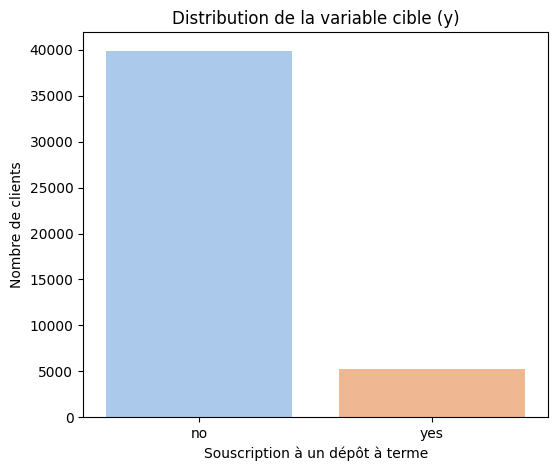


Nombre total de clients : 45211
Taux de souscription : 11.7 %


In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='y', palette='pastel')
plt.title("Distribution de la variable cible (y)")
plt.xlabel("Souscription à un dépôt à terme")
plt.ylabel("Nombre de clients")
plt.show()

print("\nNombre total de clients :", len(df))
print("Taux de souscription :", round(df['y'].value_counts(normalize=True).get('yes', 0)*100, 2), "%")

Matrice de corrélation des variables numériques :


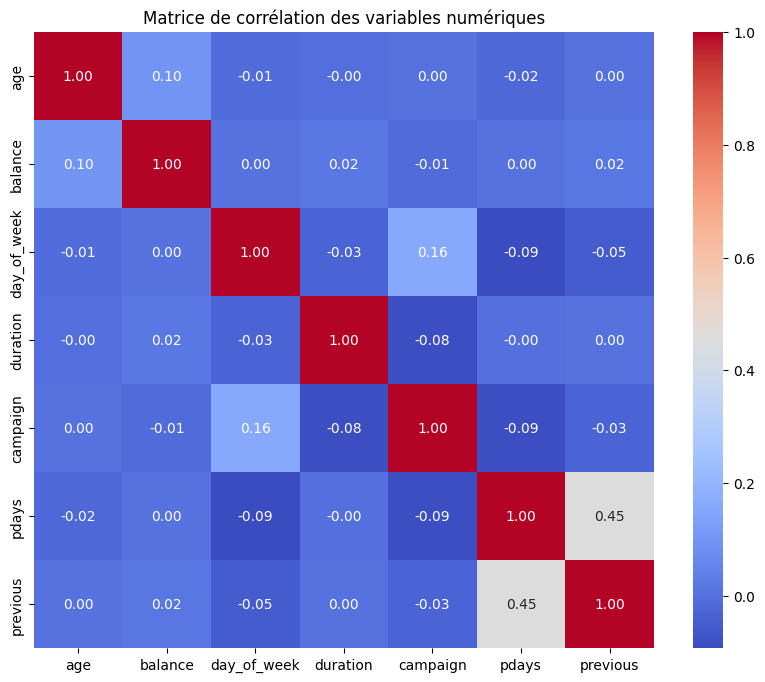

In [ ]:
print("Matrice de corrélation des variables numériques :")
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes('number').corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Matrice de corrélation des variables numériques")
plt.show()

Distributions des variables numériques clés :


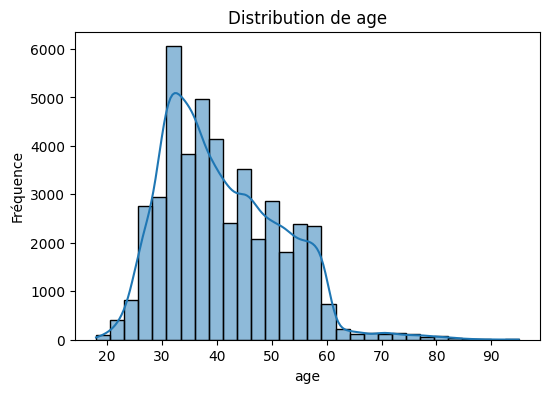

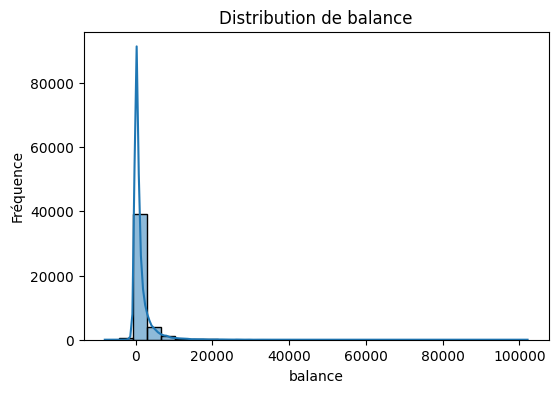

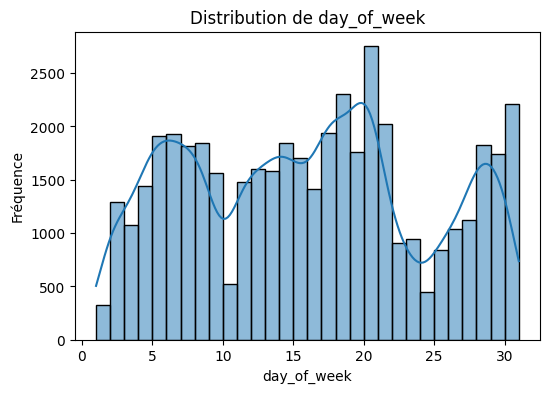

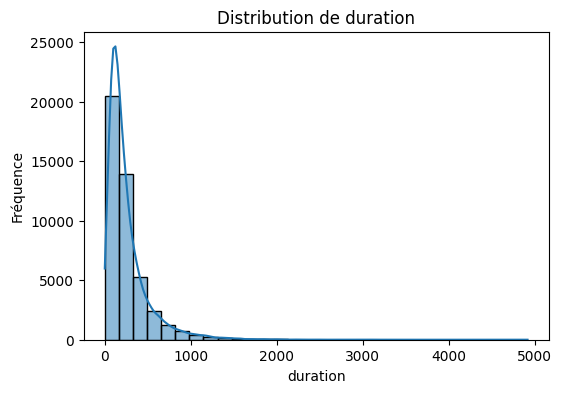

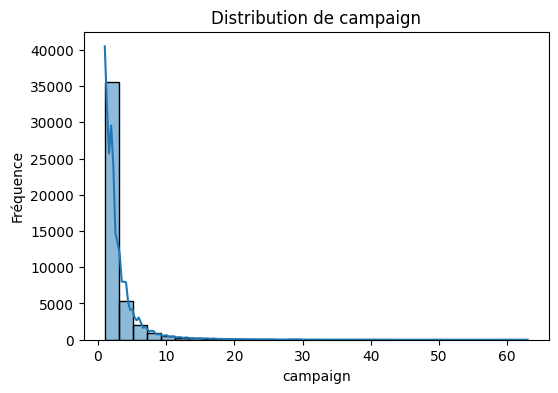

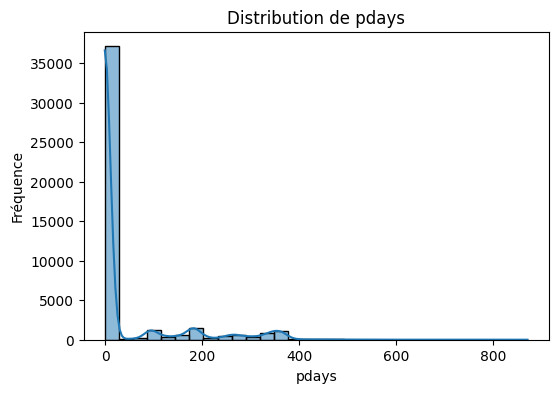

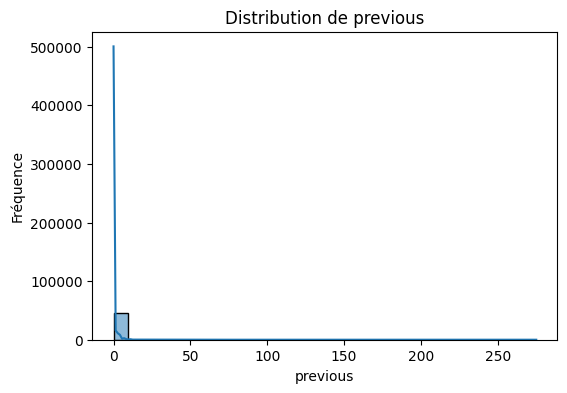

In [ ]:
print("Distributions des variables numériques clés :")
numeric_cols = ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous'] # Corrected 'day' to 'day_of_week'
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30) # dropna to handle NaN if any
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()

Répartition de la variable cible (y) en fonction des variables catégorielles :


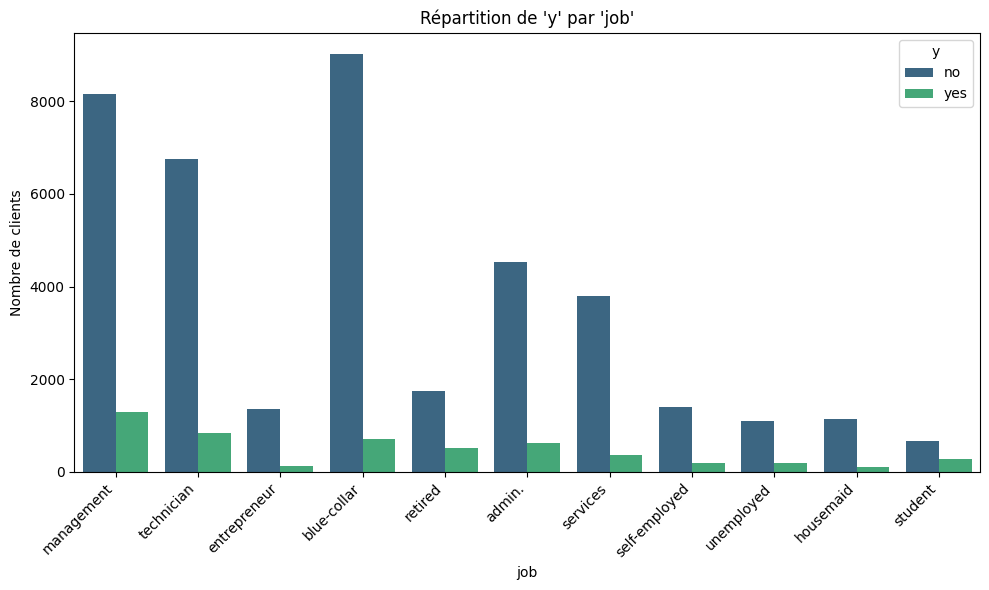

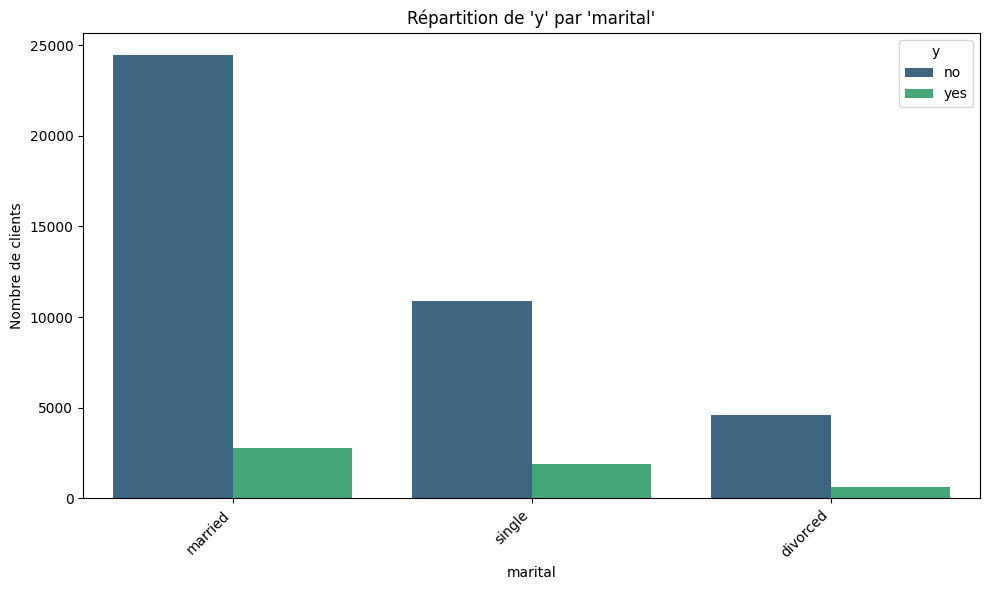

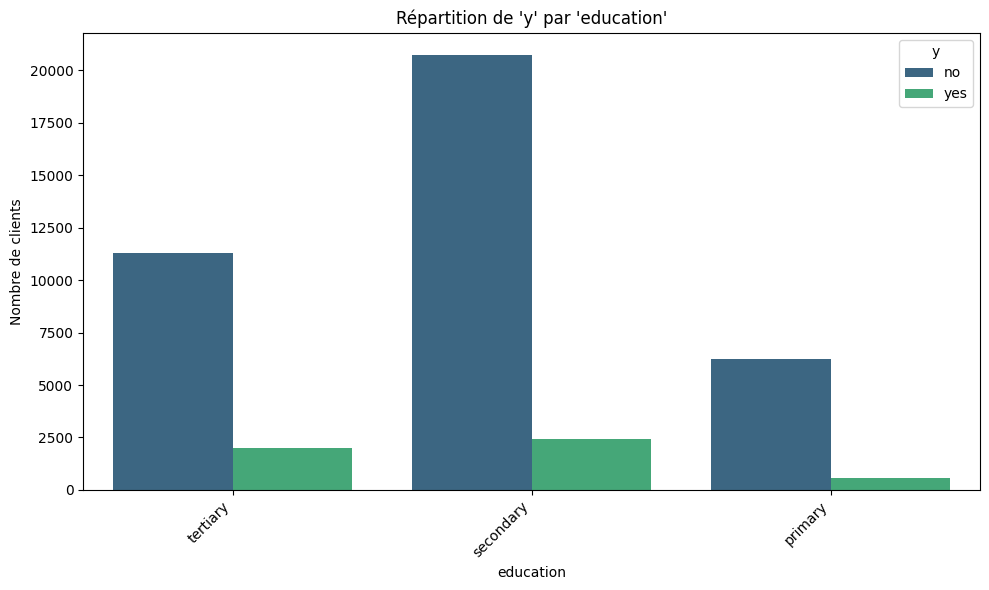

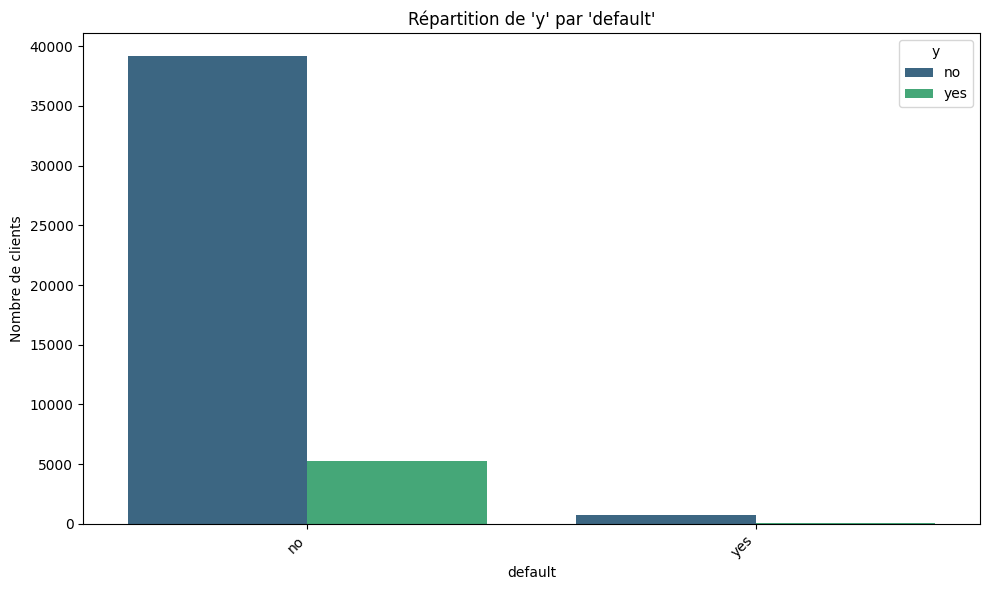

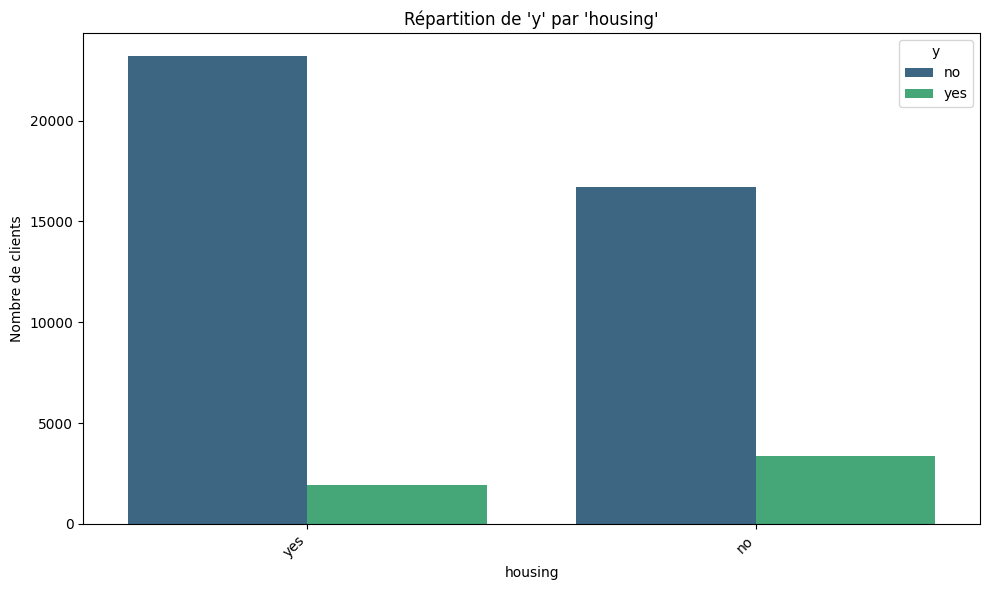

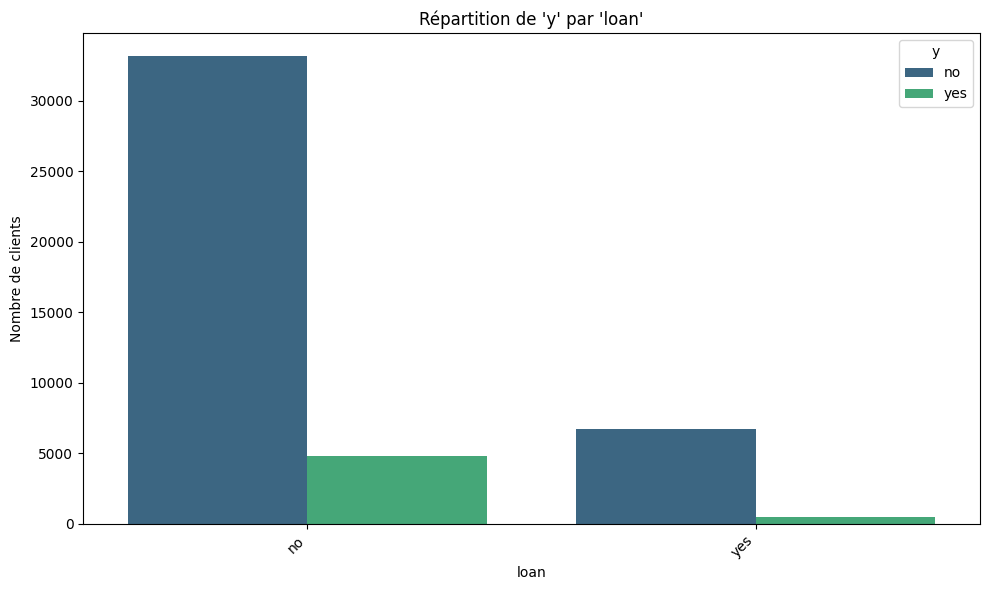

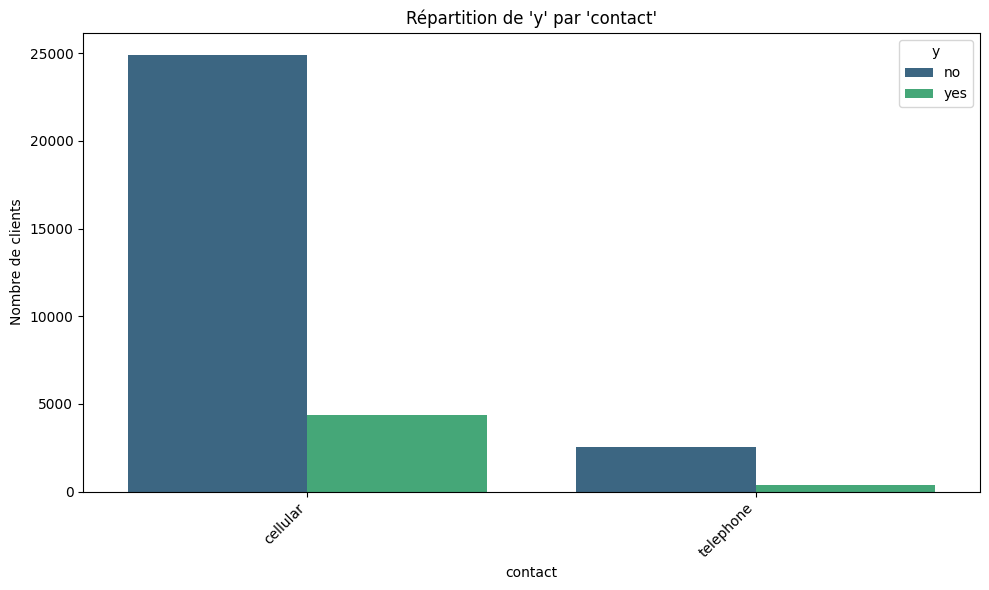

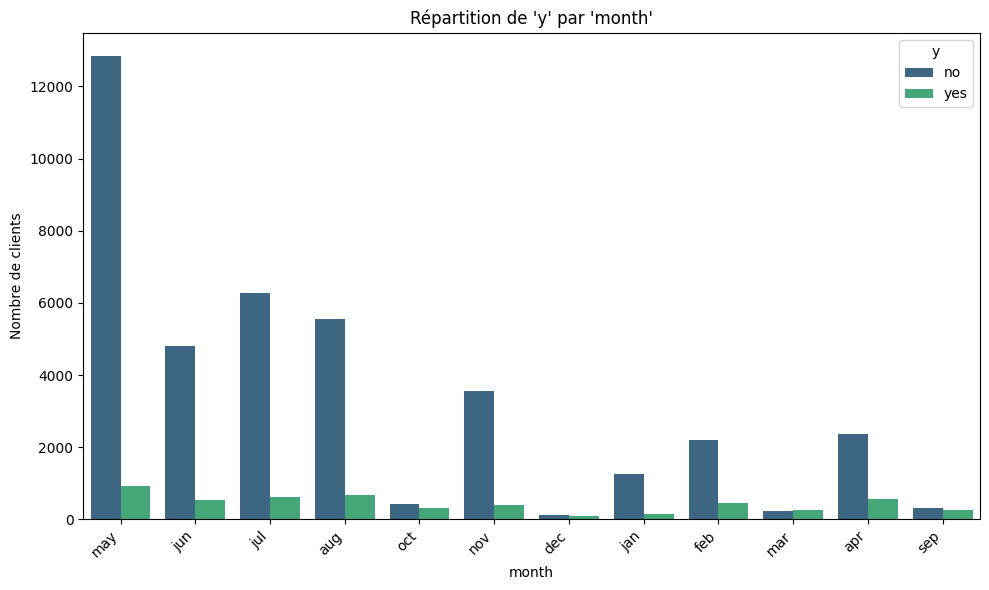

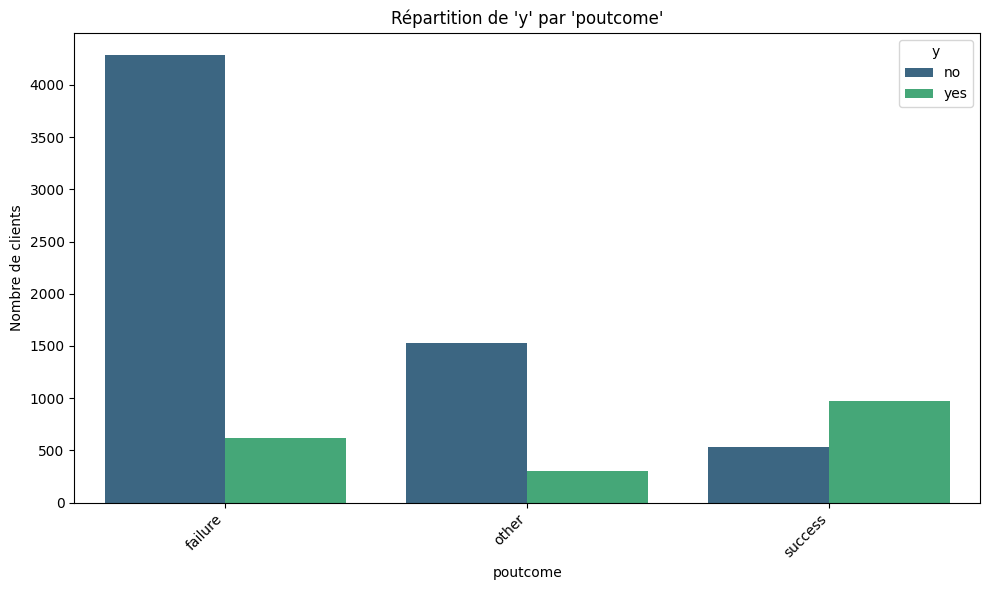

In [ ]:
print("Répartition de la variable cible (y) en fonction des variables catégorielles :")
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# For better visualization, we'll iterate and plot each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='y', palette='viridis')
    plt.title(f"Répartition de 'y' par '{col}'")
    plt.xlabel(col)
    plt.ylabel("Nombre de clients")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()